# K means Clustering
- Customer segmentation.

*Let's start by importing some libraries.*

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [48]:
data = pd.read_csv('Online+Retail.csv', encoding='cp1252')

*Let's carry out the general inspection of the data as follows*

In [49]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.550,17850.000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.390,17850.000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.750,17850.000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.390,17850.000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.390,17850.000,United Kingdom


In [50]:
print(data.shape)

(541909, 8)


In [51]:
round(100*data.isnull().sum()/data.shape[0], 2)

InvoiceNo      0.000
StockCode      0.000
Description    0.270
Quantity       0.000
InvoiceDate    0.000
UnitPrice      0.000
CustomerID    24.930
Country        0.000
dtype: float64

*Let's drop the rows with missing values as follows*

In [52]:
data.dropna(inplace=True)

In [53]:
data.shape

(406829, 8)

*Still, considerably a large amount of data has been retained after dropping the missing values.*

#### Let's carry out RFM Analysis for the retail segmentation problem
- R (Recency) : No. of days since last purchase.
- F (Frequency) : No. of transactions.
- M (Monetary) : Total amount of transactions.

*Let's start by calculating the amount for each purchase as follows.*

In [54]:
data['Amount'] = data['UnitPrice']*data['Quantity']

In [55]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.550,17850.000,United Kingdom,15.300
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.390,17850.000,United Kingdom,20.340
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.750,17850.000,United Kingdom,22.000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.390,17850.000,United Kingdom,20.340
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.390,17850.000,United Kingdom,20.340


In [56]:
# Monetary
rfm_df = data.groupby('CustomerID')['Amount'].sum().reset_index()
rfm_df.head()

,CustomerID,Amount
0,12346.000,0.000
1,12347.000,4310.000
2,12348.000,1797.240
3,12349.000,1757.550
4,12350.000,334.400


In [57]:
# Frequency
frequency = data.groupby('CustomerID')['InvoiceNo'].count().reset_index()['InvoiceNo']
rfm_df = pd.concat([rfm_df, frequency], axis=1)
rfm_df.head()

,CustomerID,Amount,InvoiceNo
0,12346.000,0.000,2
1,12347.000,4310.000,182
2,12348.000,1797.240,31
3,12349.000,1757.550,73
4,12350.000,334.400,17


In [58]:
# Recency
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format = '%d-%m-%Y %H:%M')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom,15.300
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom,22.000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340


In [59]:
maximum_date = max(data['InvoiceDate'])
maximum_date

Timestamp('2011-12-09 12:50:00')

In [60]:
data['Difference in days'] = maximum_date-data['InvoiceDate']

In [61]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Difference in days
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom,15.300,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom,22.000,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom,20.340,373 days 04:24:00


In [62]:
recency = data.groupby('CustomerID')['Difference in days'].min().reset_index()['Difference in days']

In [63]:
rfm_df = pd.concat([rfm_df, recency], axis=1)
rfm_df.head()

,CustomerID,Amount,InvoiceNo,Difference in days
0,12346.000,0.000,2,325 days 02:33:00
1,12347.000,4310.000,182,1 days 20:58:00
2,12348.000,1797.240,31,74 days 23:37:00
3,12349.000,1757.550,73,18 days 02:59:00
4,12350.000,334.400,17,309 days 20:49:00


In [64]:
rfm_df.columns = ['CustomerID', 'Monetary', 'Frequency', 'Recency']
rfm_df.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.000,0.000,2,325 days 02:33:00
1,12347.000,4310.000,182,1 days 20:58:00
2,12348.000,1797.240,31,74 days 23:37:00
3,12349.000,1757.550,73,18 days 02:59:00
4,12350.000,334.400,17,309 days 20:49:00


*For the Recency column, granularity of this level is probably not required. Only the number of days would suffice.*

In [65]:
rfm_df['Recency'] = rfm_df['Recency'].dt.days

In [66]:
rfm_df.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.000,0.000,2,325
1,12347.000,4310.000,182,1
2,12348.000,1797.240,31,74
3,12349.000,1757.550,73,18
4,12350.000,334.400,17,309


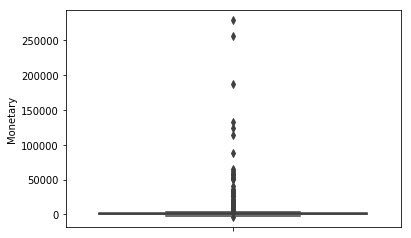

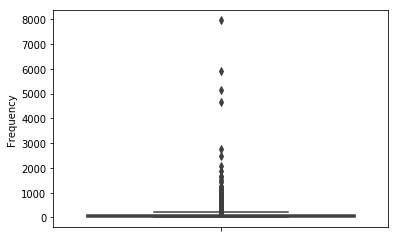

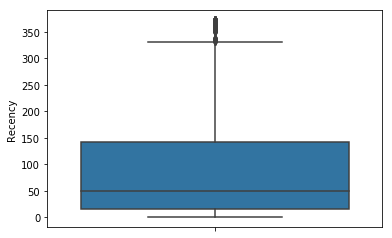

In [67]:
for i in rfm_df.columns[1:]:
    sns.boxplot(y=rfm_df[i])
    plt.show()

In [68]:
rfm_df.describe(percentiles=[0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8,
                             0.85, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1]).T

,count,mean,std,min,2%,5%,10%,15%,20%,25%,30%,35%,40%,45%,50%,55.0%,60%,65%,70%,75%,80%,85%,90%,95%,96%,97%,98%,99%,100%,max
CustomerID,4372.000,15299.678,1722.391,12346.000,12452.420,12613.550,12902.200,13207.650,13505.200,13812.750,14110.300,14417.700,14706.200,15023.950,15300.500,15596.050,15884.200,16185.150,16479.700,16778.250,17079.800,17394.700,17685.900,17984.450,18053.320,18111.740,18170.580,18226.290,18287.000,18287.000
Monetary,4372.000,1898.460,8219.345,-4287.630,47.593,101.138,146.022,187.985,234.392,293.363,337.370,391.724,465.412,560.445,648.075,758.322,909.134,1079.026,1311.979,1611.725,2002.092,2580.955,3505.600,5625.004,6613.055,7838.259,10491.037,17226.295,279489.020,279489.020
Frequency,4372.000,93.053,232.472,1.000,2.000,4.000,7.000,10.000,14.000,17.000,21.000,25.000,29.000,35.000,42.000,49.000,58.000,70.000,85.000,102.000,124.000,155.000,212.000,317.900,358.160,416.740,497.900,671.870,7983.000,7983.000
Recency,4372.000,91.047,100.765,0.000,0.000,2.000,4.000,8.000,10.000,16.000,21.000,25.000,31.000,39.000,49.000,58.000,70.000,83.000,107.000,142.000,177.800,217.000,263.000,312.000,323.000,337.000,360.580,368.000,373.000,373.000


*Let's remove the statistical outliers as follows..*

In [69]:
# Monetary outlier treatment
q1 = rfm_df['Monetary'].quantile(0.05)
q3 = rfm_df['Monetary'].quantile(0.95)
iqr = q3-q1
rfm_df = rfm_df[(rfm_df['Monetary'] >= q1 - 1.5*iqr) & (rfm_df['Monetary'] <= q3 + 1.5*iqr)]

# Frequency outlier treatment
q1 = rfm_df['Frequency'].quantile(0.05)
q3 = rfm_df['Frequency'].quantile(0.95)
iqr = q3-q1
rfm_df = rfm_df[(rfm_df['Frequency'] >= q1 - 1.5*iqr) & (rfm_df['Frequency'] <= q3 + 1.5*iqr)]

# Recency outlier treatment
q1 = rfm_df['Recency'].quantile(0.05)
q3 = rfm_df['Recency'].quantile(0.95)
iqr = q3-q1
rfm_df = rfm_df[(rfm_df['Recency'] >= q1 - 1.5*iqr) & (rfm_df['Recency'] <= q3 + 1.5*iqr)]

rfm_df.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.000,0.000,2,325
1,12347.000,4310.000,182,1
2,12348.000,1797.240,31,74
3,12349.000,1757.550,73,18
4,12350.000,334.400,17,309


*Let's scale the data using Standardization.*

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [71]:
rfm_df_scaled = pd.DataFrame(scaler.fit_transform(rfm_df[list(rfm_df.columns[1:])]))
rfm_df_scaled.columns = ['Monetary', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Monetary,Frequency,Recency
0,-0.724,-0.753,2.302
1,1.732,1.042,-0.906
2,0.300,-0.464,-0.184
3,0.278,-0.045,-0.738
4,-0.533,-0.603,2.143


*Let's now do the modelling part.*

In [73]:
from sklearn.cluster import KMeans

In [74]:
# Elbow Curve / S.S.D.
clusters = [2,3,4,5,6,7,8]
ssd=[]
for i in clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rfm_df_scaled.iloc[:, :])
    ssd.append(kmeans.inertia_)

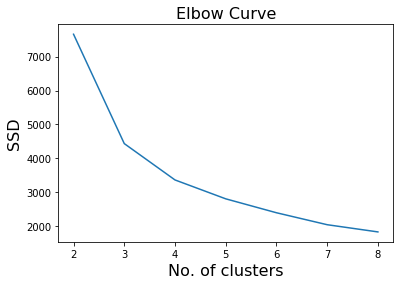

In [75]:
sns.lineplot(x=clusters, y=ssd)
plt.xlabel('No. of clusters', fontsize=16)
plt.ylabel('SSD', fontsize=16)
plt.title('Elbow Curve', fontsize=16)
plt.show()

*From the Elbow Curve analysis, 3 clusters seems like a fair choice.*

In [76]:
# Silhouette Analysis
from sklearn.metrics import silhouette_score
for i in clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rfm_df_scaled.iloc[:, 1:])
    labels = kmeans.labels_
    silhoutte_avg = silhouette_score(rfm_df_scaled.iloc[:, 1:], labels)
    print('For clusters = {0}, silhouette score is {1}'.format(i, silhoutte_avg))

For clusters = 2, silhouette score is 0.5103555406835236
For clusters = 3, silhouette score is 0.5794064759832835
For clusters = 4, silhouette score is 0.5079138260404886
For clusters = 5, silhouette score is 0.4905649653998944
For clusters = 6, silhouette score is 0.46816160351060226
For clusters = 7, silhouette score is 0.4264460114135068
For clusters = 8, silhouette score is 0.41759654560590287


*Considering both the Elbow Curve and the Silhoutte score, let's take the number of clusters to be 3.*

In [77]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfm_df_scaled.iloc[:, :])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [78]:
rfm_df['Cluster ID'] = kmeans.labels_
rfm_df.head()

,CustomerID,Monetary,Frequency,Recency,Cluster ID
0,12346.000,0.000,2,325,0
1,12347.000,4310.000,182,1,1
2,12348.000,1797.240,31,74,2
3,12349.000,1757.550,73,18,2
4,12350.000,334.400,17,309,0


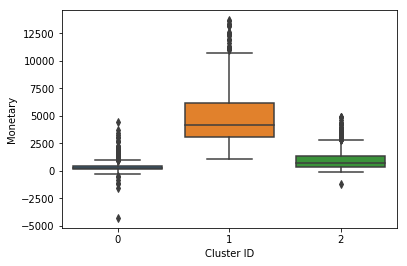

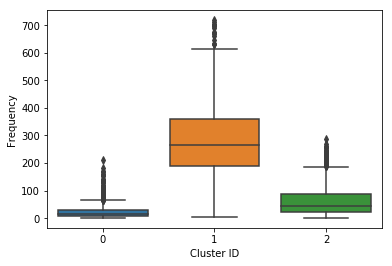

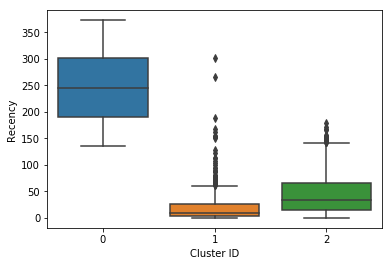

In [79]:
for i in rfm_df.columns[1:-1]:
    sns.boxplot(x=rfm_df['Cluster ID'], y=rfm_df[i])
    plt.show()

# Some observations...

- *`Monetary`: In terms of monetary contribution, cluster 1 seems to have the most significant impact followed by cluster 2 with limited impact.*

- *`Frequency`: Here also, cluster 1 seems to have the biggest impact with the highest frequencies. Cluster 2, again, has a limited impact.*

- *`Recency`: The cluster that has shopped in the most recent times is yet again cluster 1 thus making the most significant impact. Cluster 2 comes at second and people belonging to cluster 0 don't shop that frequently.*

*"Segment of people belonging to* `**Cluster 1** *are the most important customers."*

In [85]:
rfm_df[rfm_df['Cluster ID']==1]

,CustomerID,Monetary,Frequency,Recency,Cluster ID
1,12347.000,4310.000,182,1,1
10,12357.000,6207.670,131,32,1
12,12359.000,6245.530,254,7,1
15,12362.000,5154.580,274,2,1
20,12370.000,3545.690,167,50,1
27,12378.000,4008.620,219,129,1
50,12409.000,11056.930,114,78,1
56,12417.000,3578.800,198,2,1
66,12428.000,7877.200,300,25,1
69,12431.000,6416.390,240,35,1
